In [4]:
model_list = client.models.list()
for model in model_list.data:
    print(model.id)

gpt-4-turbo-2024-04-09
gpt-4o-2024-08-06
gpt-4o-mini-2024-07-18
o1-preview-2024-09-12
o1-mini-2024-09-12
o3-mini-2025-01-31
meta-llama-3.1-405b
meta-llama-3.2-11b
meta-llama-3.3-70b
gemini-1.5-pro
gemini-1.5-flash
gemini-2.0-flash-001
claude-3.5-sonnet
qwen-2.5-coder-32b
deepseek-r1-distill-llama-70b
text-embedding-ada-002
text-embedding-3-small
text-embedding-3-large
bge_small
bge_large
whisper-tiny
whisper-small
whisper-medium
whisper-large


In [5]:
model="gpt-4o-2024-08-06"

In [6]:
import pandas as pd

In [7]:
TRANSACTION_DATA_FILE_PATH = 'Store_Sales_Price_Elasticity_Promotions_Data.parquet'
df=pd.read_parquet(TRANSACTION_DATA_FILE_PATH)
df

,Store_Number,SKU_Coded,Product_Class_Code,Sold_Date,Qty_Sold,Total_Sale_Value,On_Promo
0,1320,6172800,22875,2021-11-02,3,56.849998,0
1,2310,6172800,22875,2021-11-03,1,18.950001,0
2,3080,6172800,22875,2021-11-03,1,18.950001,0
3,2310,6172800,22875,2021-11-06,1,18.950001,0
4,4840,6172800,22875,2021-11-07,1,18.950001,0
...,...,...,...,...,...,...,...
697889,880,6205800,22875,2024-03-30,1,6.990000,0
697890,2970,6205850,24375,2024-03-29,1,69.989998,0
697891,3630,6205900,22850,2024-03-24,3,59.970001,0
697892,2970,6205900,22850,2024-03-27,1,19.990000,0


In [8]:
df.describe()

,Store_Number,SKU_Coded,Product_Class_Code,Qty_Sold,Total_Sale_Value,On_Promo
count,697894.000000,6.978940e+05,697894.000000,697894.000000,697894.000000,697894.000000
mean,2322.063537,6.188240e+06,23284.495747,1.484536,19.018131,0.006256
std,1174.914952,9.044149e+03,672.547472,2.111665,24.517405,0.078847
min,330.000000,6.172800e+06,22800.000000,1.000000,0.010000,0.000000
25%,1320.000000,6.179300e+06,22850.000000,1.000000,6.990000,0.000000
50%,2310.000000,6.188400e+06,22925.000000,1.000000,10.950000,0.000000
75%,3190.000000,6.195950e+06,24375.000000,1.000000,21.990000,0.000000
max,4840.000000,6.205900e+06,24425.000000,239.000000,2094.090088,1.000000


TOOL 1

In [9]:
import duckdb

In [10]:
def generate_sql_query(prompt,table,columns):
  SQL_GENERATION_PROMPT = """
                          Generate an SQL query based on a prompt. Do not reply with anything besides the SQL query.
                          The prompt is: {prompt}

                          The available columns are: {columns}
                          The table name is: {table}
                          """
  formatted_prompt = SQL_GENERATION_PROMPT.format(prompt=prompt, columns=columns, table=table)
  sql_query=client.chat.completions.create(
    model=model,
    messages=[{"role":"user","content":formatted_prompt}],
  )
  return sql_query.choices[0].message.content

In [11]:
def lookup_sales_data(user_prompt,df):
  try:
    table="Sales"
    df=df
    columns=df.columns
    duckdb.sql(f"CREATE TABLE IF NOT EXISTS {table} AS SELECT * FROM df")
    sql_query=generate_sql_query(user_prompt,table,columns)
    sql_query = sql_query.strip()
    sql_query = sql_query.replace("```sql", "").replace("```", "")

    result = duckdb.sql(sql_query).df()

    return result.to_string()
  
  except Exception as e:
        return f"Error accessing data: {str(e)}"


In [12]:
user_prompt="Show me all the sales for store 1320 on November 1st, 2021"
result_data=lookup_sales_data(user_prompt,df)

In [13]:
result_data

'    Store_Number  SKU_Coded  Product_Class_Code  Sold_Date  Qty_Sold  Total_Sale_Value  On_Promo\n0           1320    6173050               22875 2021-11-01         1          4.990000         0\n1           1320    6174250               22875 2021-11-01         1          0.890000         0\n2           1320    6176200               22975 2021-11-01         2         99.980003         0\n3           1320    6176800               22800 2021-11-01         1         14.970000         0\n4           1320    6177250               22975 2021-11-01         1          6.890000         0\n5           1320    6177300               22800 2021-11-01         1          9.990000         0\n6           1320    6177350               22800 2021-11-01         2         16.980000         0\n7           1320    6177700               22875 2021-11-01         1          3.190000         0\n8           1320    6178000               22875 2021-11-01         2          6.380000         0\n9           1320   

Tool 2

In [14]:
def analyse_sales_data(data,prompt):
  analysis_prompt="""
                  Analyze the following data: {data}
                  Your job is to answer the following question: {prompt}
                  """
  formatted_prompt = analysis_prompt.format(data=data, prompt=prompt)
  response=client.chat.completions.create(
    model=model,
    messages=[{"role":"user","content":formatted_prompt}],
  )
  analysis=response.choices[0].message.content
  return analysis

In [15]:
user_prompt="what trends do you see in this data?"
analysis=analyse_sales_data(result_data,user_prompt)

In [16]:
print(analysis)

Based on the provided dataset, we can identify a few trends:

1. **Promotion Impact**: Almost all transactions have the `On_Promo` field set to 0, indicating that the majority of the sales occurred without any promotional activity. Only one entry has `On_Promo` set to 1 (Row 29), suggesting that product promotions were not a significant driver for sales during this date. 

2. **Product Class Code Trends**: The data presents several transactions across different `Product_Class_Code` values, such as 22875, 22975, 22800, 24400, and 24425. However, there is no clear indication of which product class is more dominant in sales volume or value since the data range for each product class is varied. It may require aggregating by product class to identify dominant ones.

3. **Quantity Sold and Total Sale Value Relationship**: There is a pattern where items sold in higher quantities tend to have a lower cost per unit, and items with higher sale values tend to be sold in smaller quantities. For ex

Tool 3

In [29]:
def visualise_code(data,prompt):
  visualisation_prompt="""
                      Generate a visualisation script based on this data: {data}
                      The goal is to show: {visualization_goal}
                      give only the code and nothing else as this output will be directly passed to execute the script
                      """
  formatted_prompt=visualisation_prompt.format(data=data,visualization_goal=prompt)
  response=client.chat.completions.create(
    model=model,
    messages=[{"role":"user","content":formatted_prompt}])
  code=response.choices[0].message.content
  code = code.replace("```python", "").replace("```", "")
  code = code.strip()
  return code
                          

In [33]:
code=visualise_code(result_data,"A bar chart of sales by product SKU. Put the product SKU on the x-axis and the sales value on the y-axis.")

In [34]:
print(code)

import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'SKU_Coded': [
        6173050, 6174250, 6176200, 6176800, 6177250, 6177300, 6177350, 6177700, 6178000, 6178250,
        6179250, 6179300, 6179400, 6179450, 6179500, 6179750, 6180550, 6182050, 6183750, 6184100,
        6188550, 6190050, 6190150, 6190200, 6190250, 6190350, 6190400, 6193750, 6195350, 6195800
    ],
    'Total_Sale_Value': [
        4.99, 0.89, 99.98, 14.97, 6.89, 9.99, 16.98, 3.19, 6.38, 16.59,
        14.99, 9.98, 29.98, 14.99, 14.99, 39.98, 15.99, 7.99, 38.97, 59.97,
        15.98, 19.95, 8.99, 8.99, 7.99, 6.99, 6.99, 6.99, 16.99, 25.72
    ]
}

df = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(df['SKU_Coded'].astype(str), df['Total_Sale_Value'])
plt.xlabel('Product SKU')
plt.ylabel('Total Sale Value')
plt.title('Sales by Product SKU')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


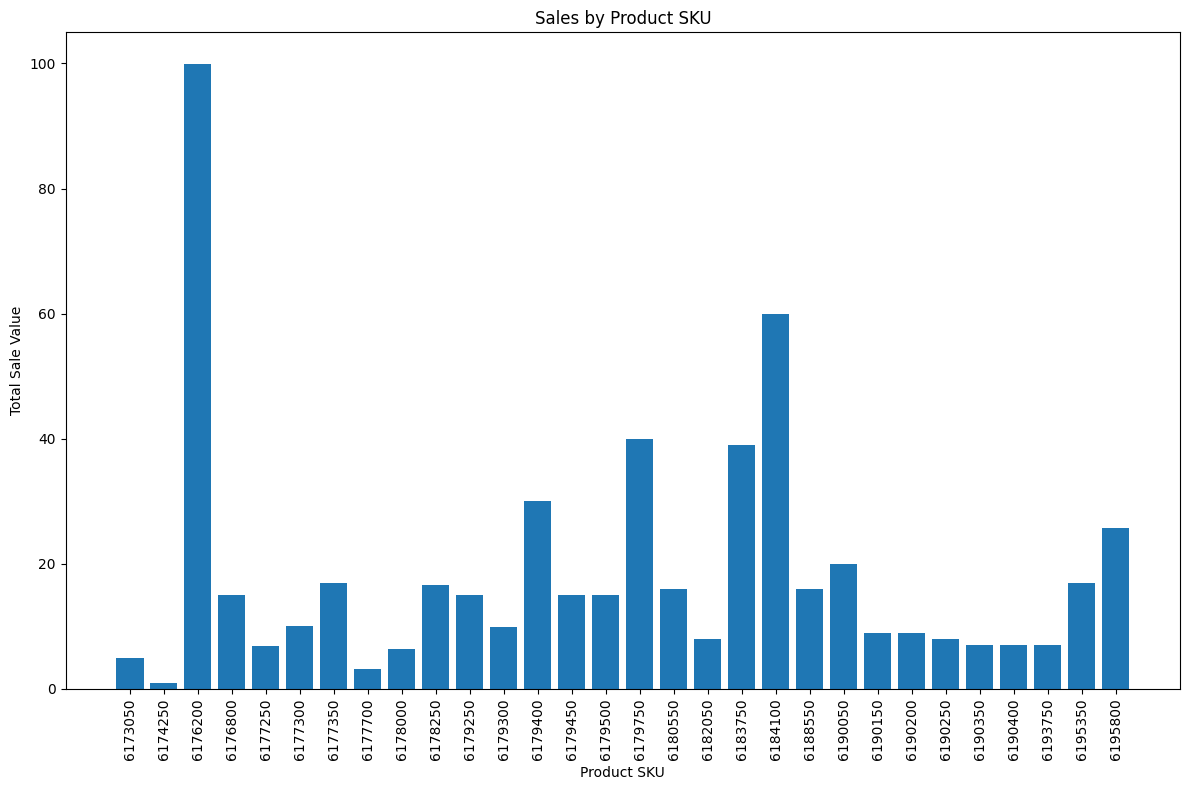

In [35]:
exec(code)